# Machine Learning Pipeline Tutorial
### Creating a reproducible machine learning pipeline that starts with web scraping and ends with a dashboard

As machine learning becomes increasingly unbiquitous in the data science world, the ability to demonstrate end-to-end pipelining is becoming an invaluable skill. This tutorial is designed as a self-learning project that will integrate many various data science skillsets that will allow for demonstration of each of the main components in a data life cycle: 1) Data collection, 2) Data cleaning/transformation, 3) Data analysis, 4) Data visualization, and 5) User-centric dashboarding.

## Gathering the Data (Web Scraping)

One of the first and most important elements of a strong data science pipeline is the selection of a high-quality data source. But to know the best data source, we need to have a question we want answered. There are MANY questions to be asked in the modern world, but most of them are depressing these days. So, instead of trying to save the world, let's find a fun question! For this notebook, let's look at how to connect a buyer to a cool, classic car of their choice using [bringatrailer.com](https://bringatrailer.com). 

First, let's explore the website a little bit! When you first go to the website, you're greeted with cars, cars, and more cars. For the carbuyer in your life, they're probably less interested in what has already sold and are, instead, interested in what they can buy. So, we'll probably want to migrate over to the ["Auctions"](https://bringatrailer.com/auctions/) tab at the top. Now, we can see all the REALLY cool cars that can be ours if we have way too much money or way too little sense. I have neither, so this is mostly a window shopping experience for me. But...still...cool.

In order for us to get to the point that we can build a user-centered dashboard that will allow a user to plug in their desired car specifications and get a list of everything available on bringatrailer, we'll first need to set up a method for crawling the data in the auctions section of the website. Let's get started:

### Setting up a Crawler
Before we can do anything fun, we'll need to create a crawler than can quickly and efficiently gather data from the site. There are a few ways to do this, but for our purposes (and given the structure of the site), we'll scrape the html code. First thing we'll do is navigate to the site and press `Ctrl` + `Shift` + `I` to open the developer panel. This will open up something that looks a little like this:
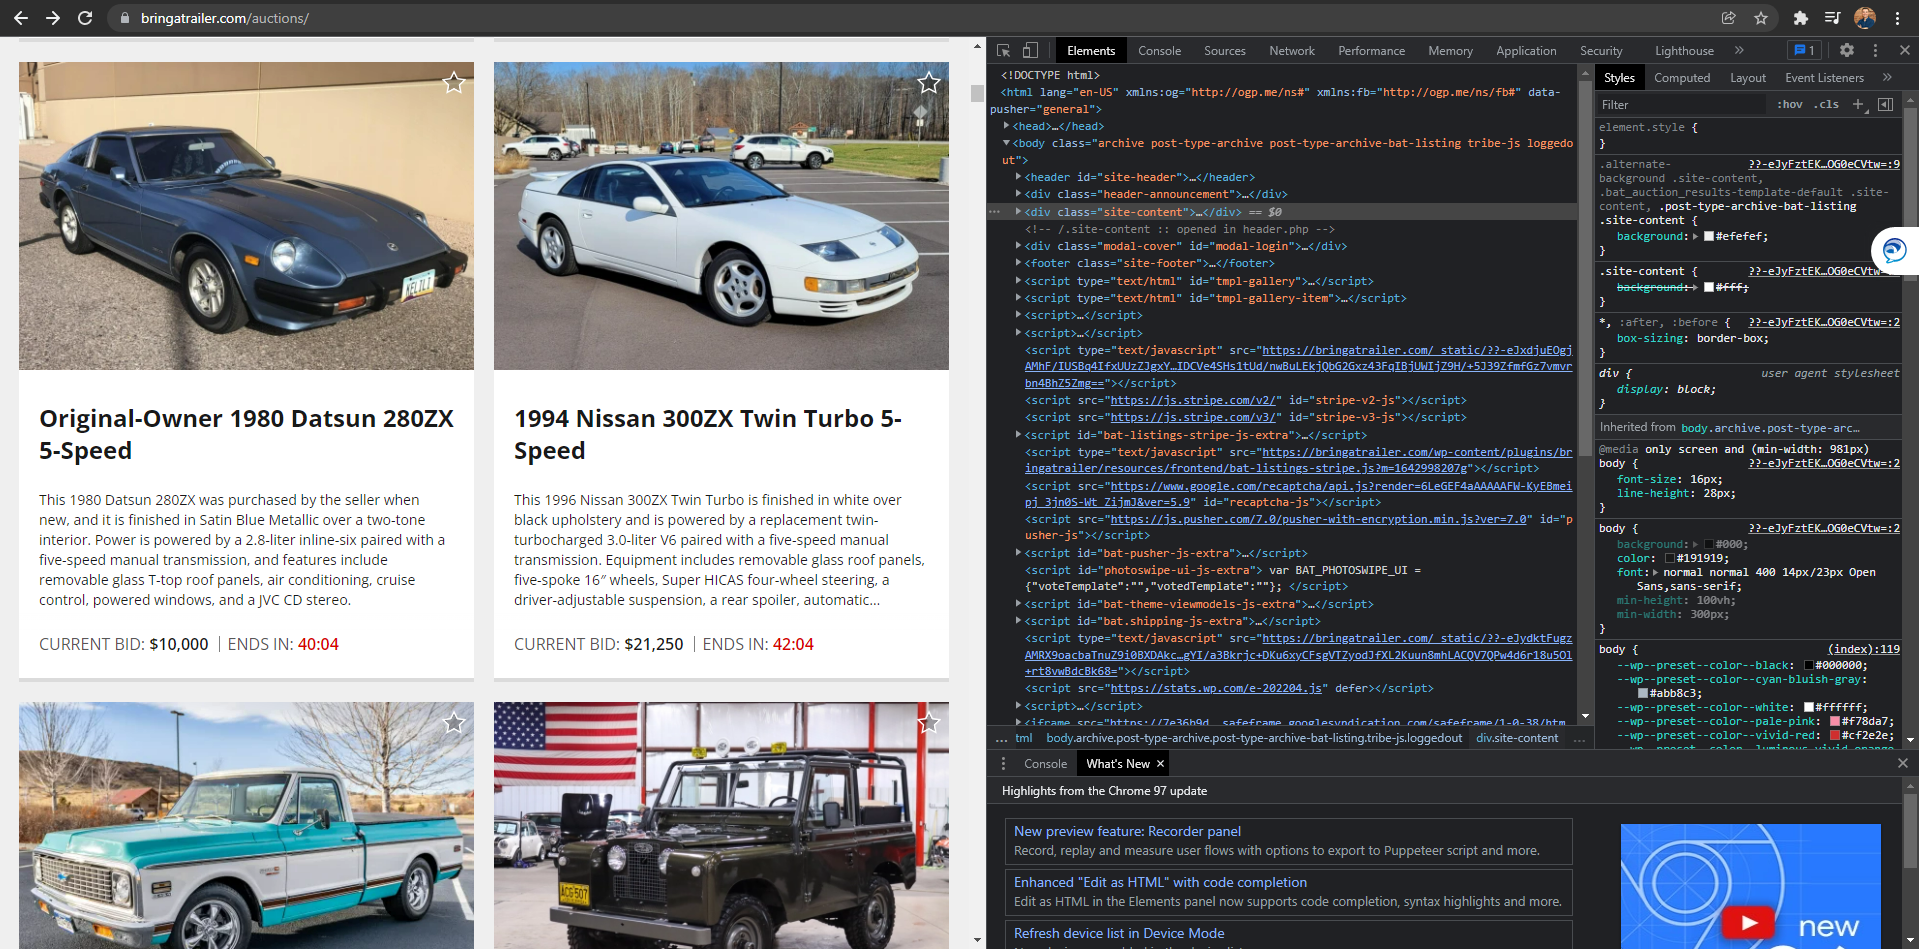

Next, we need to do some clicking around in order to find the portion of this code that has the information we really want! This will include things like the car brand, year, engine size, etc. All important things. Luckily, for this site, it's pretty obvious - all the data is captured in the subfolders for "site-content":
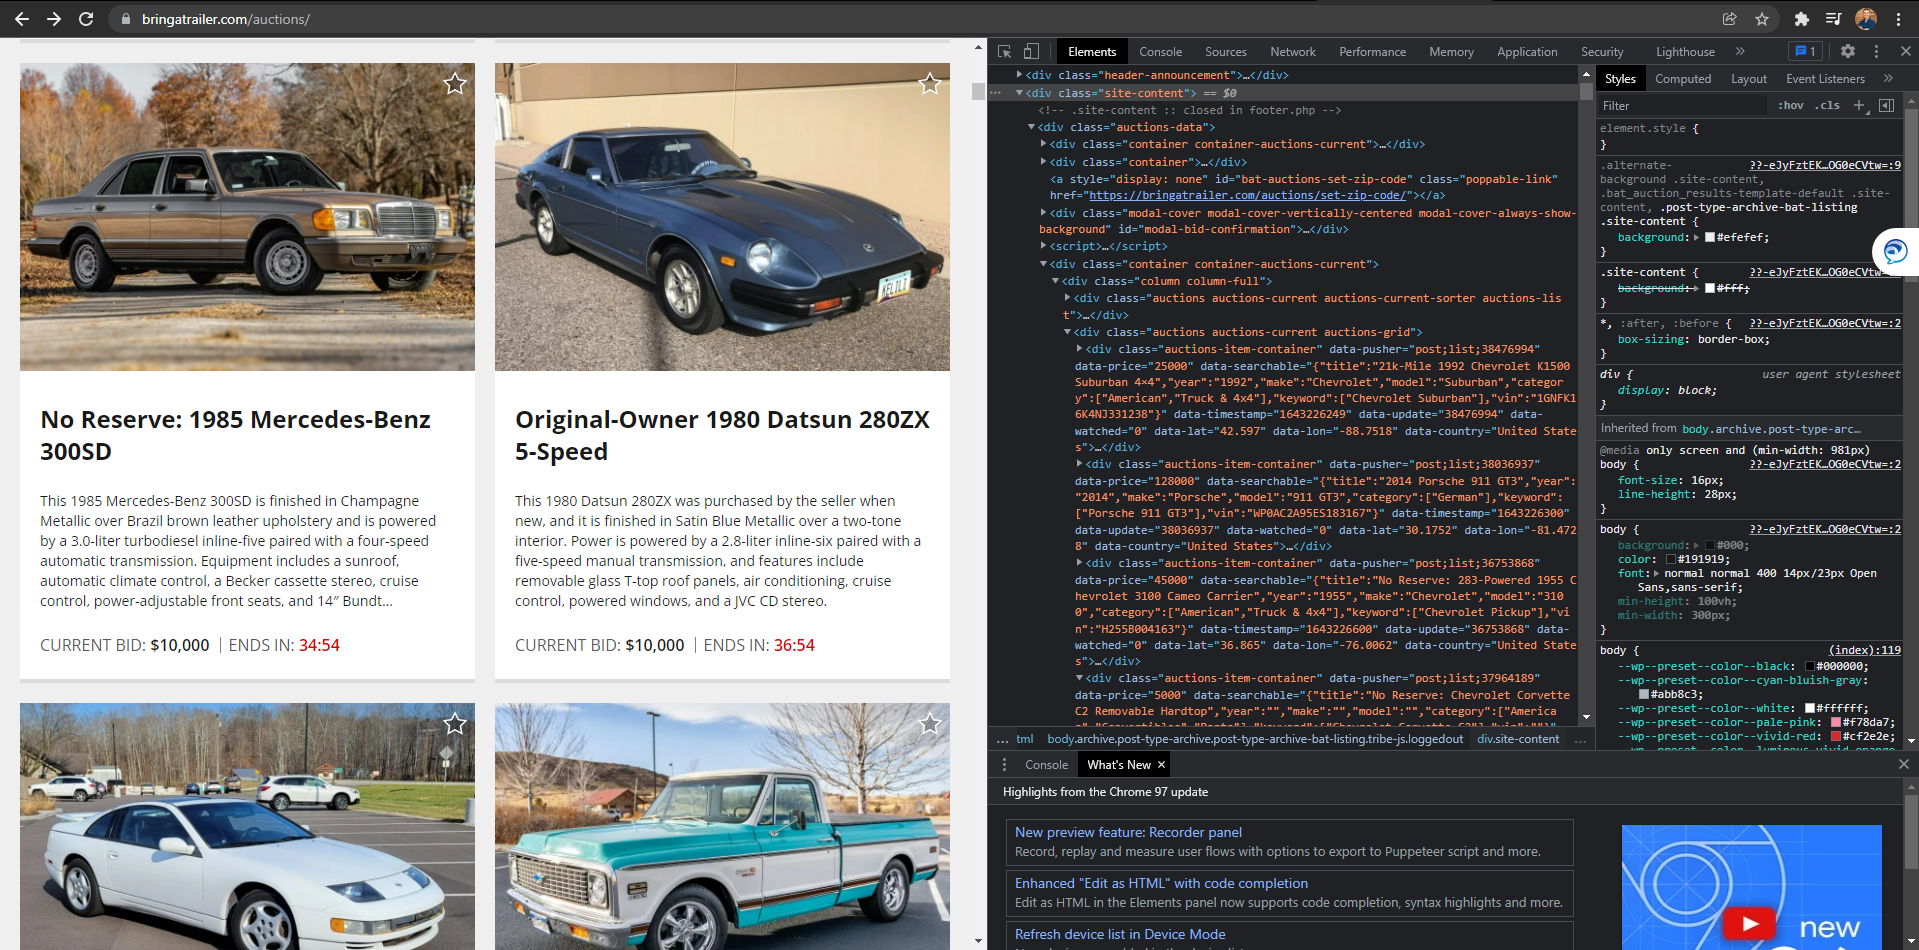

Excellent! Now, we can see that a bunch of our important information can be found in this section. In fact, all the cars on this (almost endlessly) scrollable page will be included here. We'll also probably want our dashboard to pull the links for these cars so that, once you plug in your desired information, the system can also send you to the page of interest. That data is in another subscript here:
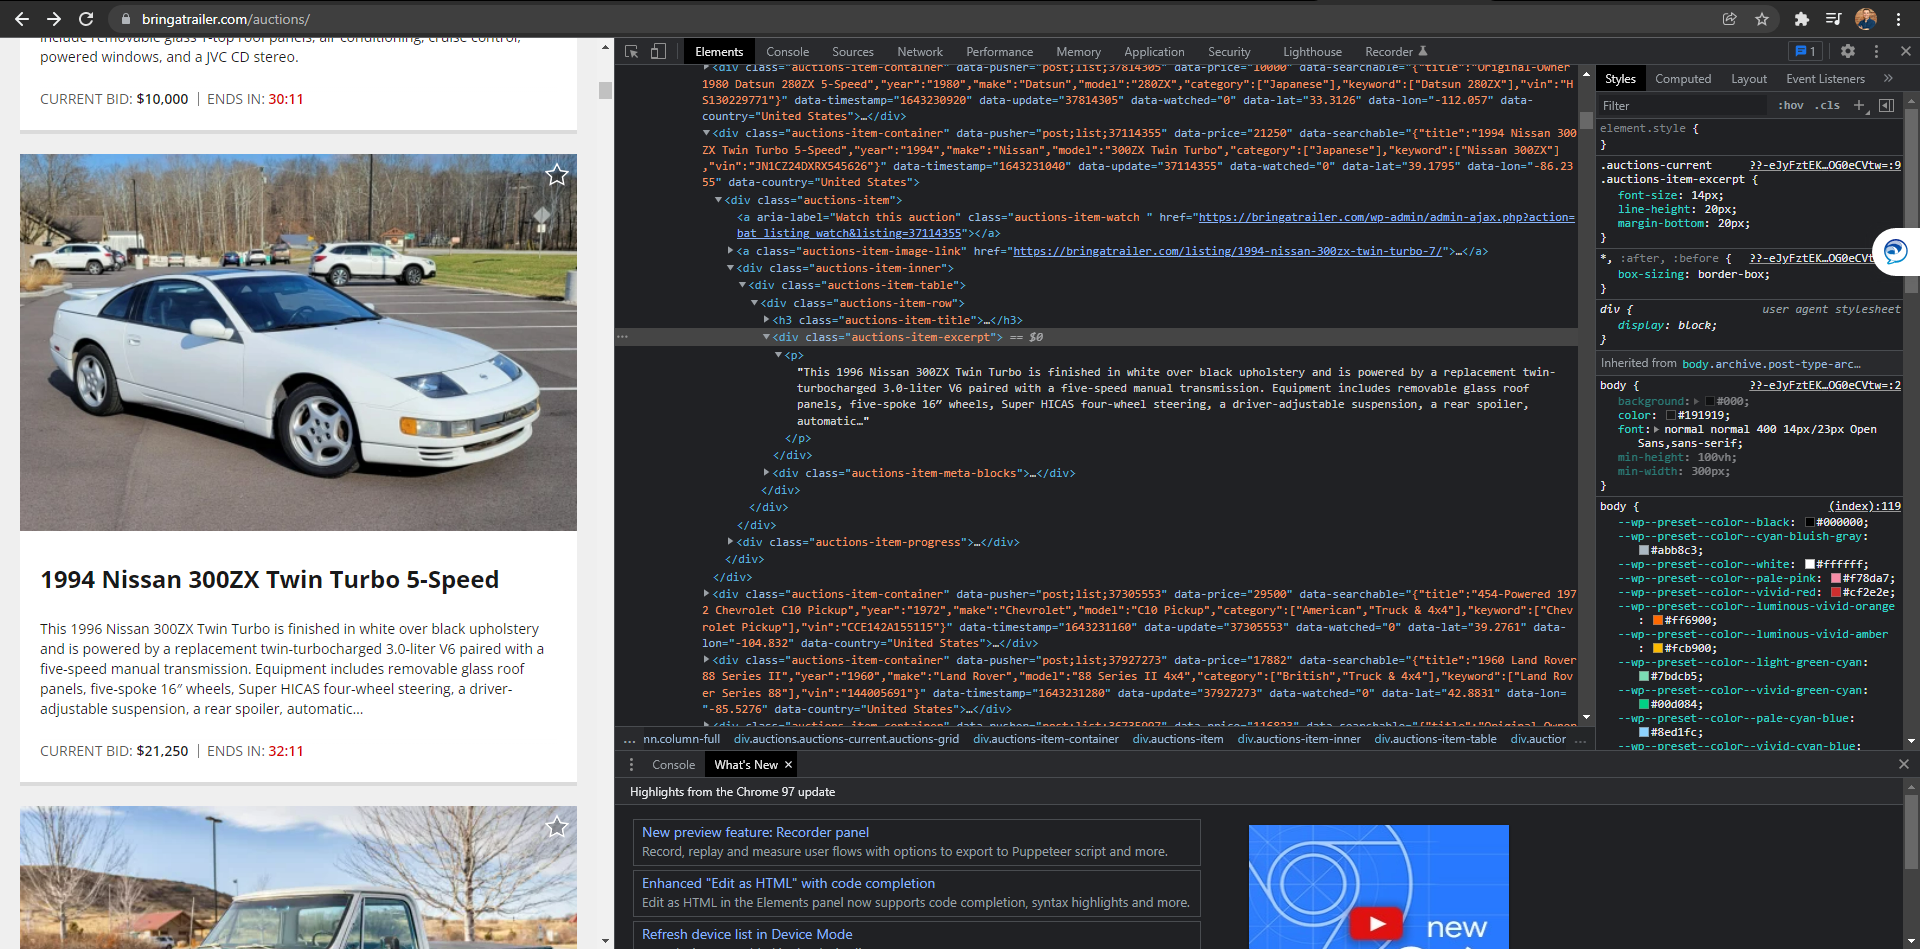

Ok, cool. So now we have all the basic details, some interesting elements of the car in the description, and the link to the page for the car itself. That'll probably be enough for us to start with! Now we need to write a python script that will adequately pull these data from the site for everything that is CURRENTLY available and organize it in a structured, tabular format. First, let's use `requests` to retrive some of the html code and see what we're working with.

In [2]:
import requests

URL = "https://bringatrailer.com/auctions/"
page = requests.get(URL)

Well that's unreadable, huh? Luckily, we don't really need this step for the purposes of reading. Instead, this code really exists to simply pull in all the html data from the site. Now that we have the data available, we're going to use the beautifulsoup4 package to explore these data and to start to pull the information we need.

In [3]:
from bs4 import BeautifulSoup
page_soup = BeautifulSoup(page.content, "html.parser")

Now that we got some nice page soup to work from, let's go ahead and try to pull some data down to see what we end up with.

In [4]:
testing = page_soup.find_all(class_ = "auctions-item-excerpt")

Well that's pretty cool! Now we've successfully pulled all the descriptions for all the cars that are currently available on the website. These are not in a tabular format, but this is much more "readable" than what we had above, for sure! Now that know we can pull this information, let's try to start building out some code that will efficiently scrape these data and then post into a tabular format. Time for some pandas!

In [5]:
##Importing the pandas packages
import pandas as pd

##Creating blank
specs_df = []
desc_df = []
link_df = []
price_df = []

##Creating text frames of the data of interest
for spec in page_soup.find_all("div", class_ = "auctions-item-container"):
    specs_df.append(spec.get("data-searchable"))
    
for desc in page_soup.find_all(class_ = "auctions-item-excerpt"):
    desc_df.append(desc)

for link in page_soup.find_all("a", class_ = "auctions-item-image-link"):
    link_df.append(link.get("href"))
    
for price in page_soup.find_all(class_ = "auctions-item-meta-block"):
    price_df.append(price.get("data-current"))
    
##Consolidating data into one dataframe
cars_df = pd.DataFrame([specs_df, desc_df, link_df, price_df])

##Peeking at the data to ensure it worked
cars_df.head()

0     \
0                                               None   
1  [[This 2003 BMW Alpina Roadster V8 is #421 of ...   
2  https://bringatrailer.com/listing/2003-bmw-z8-...   
3                                               None   

                                                1     \
0  {"title":"5k-Mile 2003 BMW Z8 Alpina Roadster ...   
1  [[This 1968 Maserati Ghibli is one of 1,170 co...   
2  https://bringatrailer.com/listing/1968-maserat...   
3                                             300000   

                                                2     \
0  {"title":"1968 Maserati Ghibli 4.7 Coupe","yea...   
1  [[This 2006 Ducati 1000LE is one of 2,000 exam...   
2  https://bringatrailer.com/listing/2006-ducati-...   
3                                               None   

                                                3     \
0  {"title":"No Reserve: 789-Mile 2006 Ducati Pau...   
1  [[This 1960 Daimler SP250 was delivered new to...   
2  https://bringatrailer.com/listing/1960-daimler...   
3                                               None   

                                                4     \
0  {"title":"50-Years-Owned 1960 Daimler SP250","...   
1  [[This 1959 Ducati 125 is said to have been re...   
2  https://bringatrailer.com/listing/1959-ducati-...   
3                                              75000   

                                                5     \
0  {"title":"No Reserve: 1959 Ducati 125","year":...   
1  [[This 2001 Lexus ES300 remained registered wi...   
2  https://bringatrailer.com/listing/2001-lexus-e...   
3                                               None   

                                                6     \
0  {"title":"No Reserve: 32k-Mile 2001 Lexus ES30...   
1  [[This 2008 Lamborghini Gallardo Spyder was so...   
2  https://bringatrailer.com/listing/2008-lamborg...   
3                                               None   

                                                7     \
0  {"title":"9k-Mile 2008 Lamborghini Gallardo Sp...   
1  [[This 1990 Volkswagen Corrado G60 is finished...   
2  https://bringatrailer.com/listing/1990-volkswa...   
3                                              31000   

                                                8     \
0  {"title":"46k-Mile 1990 Volkswagen Corrado G60...   
1  [[This 2006 Jeep Wrangler Rubicon is a two-doo...   
2  https://bringatrailer.com/listing/2006-jeep-wr...   
3                                               None   

                                                9     ...  1815     1816  \
0  {"title":"13k-Mile 2006 Jeep Wrangler Rubicon ...  ...  None     None   
1  [[This 2013 BMW 128i M-Sport coupe is powered ...  ...  None     None   
2  https://bringatrailer.com/listing/2013-bmw-1-s...  ...  None     None   
3                                               None  ...  None  1001000   

   1817  1818    1819  1820  1821     1822  1823  1824  
0  None  None    None  None  None     None  None  None  
1  None  None    None  None  None     None  None  None  
2  None  None    None  None  None     None  None  None  
3  None  None  126555  None  None  3650000  None  None  

[4 rows x 1825 columns]

Alright, so that worked pretty well! Unfortunately, it looks like there might be a couple strange elements happening in the data. First, it looks like there's a shift right in the first cell of the first row (which is a little weird). Also, our current format is wide when it should be long. Finally, there are some string separaters here that are important. So, in order to make sure we get what we really need, let's do some data transformation next.

## Cleaning the Data

The first thing that we're going to do is try to eliminate those pesky misaligned values in the description row. We'll do this with `apply` and `dropna`.

In [6]:
##First eliminating/shifting the data for row 0 where there is one extra data element
cars_df = cars_df.apply(lambda x: pd.Series(x.dropna().values), 1)
cars_df.head()

0    \
0  {"title":"5k-Mile 2003 BMW Z8 Alpina Roadster ...   
1  [[This 2003 BMW Alpina Roadster V8 is #421 of ...   
2  https://bringatrailer.com/listing/2003-bmw-z8-...   
3                                             300000   

                                                 1    \
0  {"title":"1968 Maserati Ghibli 4.7 Coupe","yea...   
1  [[This 1968 Maserati Ghibli is one of 1,170 co...   
2  https://bringatrailer.com/listing/1968-maserat...   
3                                              75000   

                                                 2    \
0  {"title":"No Reserve: 789-Mile 2006 Ducati Pau...   
1  [[This 2006 Ducati 1000LE is one of 2,000 exam...   
2  https://bringatrailer.com/listing/2006-ducati-...   
3                                              31000   

                                                 3    \
0  {"title":"50-Years-Owned 1960 Daimler SP250","...   
1  [[This 1960 Daimler SP250 was delivered new to...   
2  https://bringatrailer.com/listing/1960-daimler...   
3                                              22000   

                                                 4    \
0  {"title":"No Reserve: 1959 Ducati 125","year":...   
1  [[This 1959 Ducati 125 is said to have been re...   
2  https://bringatrailer.com/listing/1959-ducati-...   
3                                               6500   

                                                 5    \
0  {"title":"No Reserve: 32k-Mile 2001 Lexus ES30...   
1  [[This 2001 Lexus ES300 remained registered wi...   
2  https://bringatrailer.com/listing/2001-lexus-e...   
3                                               9300   

                                                 6    \
0  {"title":"9k-Mile 2008 Lamborghini Gallardo Sp...   
1  [[This 2008 Lamborghini Gallardo Spyder was so...   
2  https://bringatrailer.com/listing/2008-lamborg...   
3                                             105000   

                                                 7    \
0  {"title":"46k-Mile 1990 Volkswagen Corrado G60...   
1  [[This 1990 Volkswagen Corrado G60 is finished...   
2  https://bringatrailer.com/listing/1990-volkswa...   
3                                               8069   

                                                 8    \
0  {"title":"13k-Mile 2006 Jeep Wrangler Rubicon ...   
1  [[This 2006 Jeep Wrangler Rubicon is a two-doo...   
2  https://bringatrailer.com/listing/2006-jeep-wr...   
3                                              29500   

                                                 9    ...  \
0  {"title":"No Reserve: 2013 BMW 128i Coupe M-Sp...  ...   
1  [[This 2013 BMW 128i M-Sport coupe is powered ...  ...   
2  https://bringatrailer.com/listing/2013-bmw-1-s...  ...   
3                                              16000  ...   

                                                 598  \
0  {"title":"46k-Mile 2004 Toyota Tundra SR5 Acce...   
1  [[This 2004 Toyota Tundra SR5 is an Access Cab...   
2  https://bringatrailer.com/listing/2004-toyota-...   
3                                                  0   

                                                 599  \
0  {"title":"2008 Hummer H3 Alpha","year":"2008",...   
1  [[This 2008 Hummer H3 Alpha was originally del...   
2  https://bringatrailer.com/listing/2008-hummer-...   
3                                                  0   

                                                 600  \
0  {"title":"No Reserve: 1988 Ford Ranger XLT Sup...   
1  [[This 1988 Ford Ranger XLT is a SuperCab pick...   
2  https://bringatrailer.com/listing/1988-ford-ra...   
3                                               4500   

                                                 601  \
0  {"title":"1990 Toyota Land Cruiser FJ62","year...   
1  [[This 1990 Toyota Land Cruiser FJ62 was origi...   
2  https://bringatrailer.com/listing/1990-toyota-...   
3                                                  0   

                                                 602  \
0  {"title":"No Reserve: One-Owner

Awesome! One problem down. Next, let's reshape these data from wide to long to tidy things up a bit. Then, we can name our columns and start parsing out some of the information that will be of greatest importance to the gearhead in your life. Luckily, since these data don't really need a pivot, we can use the `transpose` command

In [7]:
##Transposing data
cars_df = cars_df.transpose()
cars_df.head()

0  \
0  {"title":"5k-Mile 2003 BMW Z8 Alpina Roadster ...   
1  {"title":"1968 Maserati Ghibli 4.7 Coupe","yea...   
2  {"title":"No Reserve: 789-Mile 2006 Ducati Pau...   
3  {"title":"50-Years-Owned 1960 Daimler SP250","...   
4  {"title":"No Reserve: 1959 Ducati 125","year":...   

                                                   1  \
0  [[This 2003 BMW Alpina Roadster V8 is #421 of ...   
1  [[This 1968 Maserati Ghibli is one of 1,170 co...   
2  [[This 2006 Ducati 1000LE is one of 2,000 exam...   
3  [[This 1960 Daimler SP250 was delivered new to...   
4  [[This 1959 Ducati 125 is said to have been re...   

                                                   2       3  
0  https://bringatrailer.com/listing/2003-bmw-z8-...  300000  
1  https://bringatrailer.com/listing/1968-maserat...   75000  
2  https://bringatrailer.com/listing/2006-ducati-...   31000  
3  https://bringatrailer.com/listing/1960-daimler...   22000  
4  https://bringatrailer.com/listing/1959-ducati-...    6500

Excellent! Now, where we had a wide dataframe we have a long dataframe. Let's get to doing some column naming. We can call the `rename` function to accomplish this.

In [8]:
##Renaming the columns
cars_df = cars_df.rename(columns = {0:"specs", 1:"description", 2:"link", 3: "high_bid"})

We're making progress! Good stuff. Now, let's try to work on the specs column. In order to get a sense of what data are included, let's start by just printing the first cell.

In [9]:
##Peeking at the contents in the specs column
cars_df.at[0,"specs"]

'{"title":"5k-Mile 2003 BMW Z8 Alpina Roadster V8","year":"2003","make":"BMW","model":"Z8 ALPINA","category":["Convertibles","German"],"keyword":["BMW Z8","BMW Alpina"],"vin":"WBAEJ13463AH62335"}'

Looks like we have a bunch of different elements here: Title, Year, Make, Model, Category, Keyword, and VIN. We probably don't need all of these, but we can write a fairly simple script that will parse out this information based on the patter that is present. Let's take a look at that next:

In [10]:
##Splitting these data into columns
cars_df[["title","year","make","model", "category", "keyword", "vin", "extra"]] = cars_df.specs.apply(
   lambda x: pd.Series(str(x).split("\",\"")))

##Dropping the extra columns in which we are not interested
cars_df = cars_df.drop(columns = ["specs", "category", "keyword", "vin", "extra"])

cars_df.head()

description  \
0  [[This 2003 BMW Alpina Roadster V8 is #421 of ...   
1  [[This 1968 Maserati Ghibli is one of 1,170 co...   
2  [[This 2006 Ducati 1000LE is one of 2,000 exam...   
3  [[This 1960 Daimler SP250 was delivered new to...   
4  [[This 1959 Ducati 125 is said to have been re...   

                                                link high_bid  \
0  https://bringatrailer.com/listing/2003-bmw-z8-...   300000   
1  https://bringatrailer.com/listing/1968-maserat...    75000   
2  https://bringatrailer.com/listing/2006-ducati-...    31000   
3  https://bringatrailer.com/listing/1960-daimler...    22000   
4  https://bringatrailer.com/listing/1959-ducati-...     6500   

                                               title         year  \
0   {"title":"5k-Mile 2003 BMW Z8 Alpina Roadster V8  year":"2003   
1           {"title":"1968 Maserati Ghibli 4.7 Coupe  year":"1968   
2  {"title":"No Reserve: 789-Mile 2006 Ducati Pau...  year":"2006   
3        {"title":"50-Years-Owned 1960 Daimler SP250  year":"1960   
4              {"title":"No Reserve: 1959 Ducati 125  year":"1959   

              make                       model  
0       make":"BMW           model":"Z8 ALPINA  
1  make":"Maserati              model":"Ghibli  
2    make":"Ducati  model":"Paul Smart 1000 LE  
3   make":"Daimler               model":"SP250  
4    make":"Ducati                 model":"125

Excellent - we're well on our way. Let's go ahead and clean up these variables a little bit now that we've successfully split everything out. Specifically, we want to strip the titles that are within the strings and any special characters that are not relevant to the data itself so that all we are left with is text data.

In [11]:
##Replacing/Retaining strings column-wise due to differences in needs
cars_df['title'] = cars_df['title'].str.replace("\{|\"|:|(?:title)", "")
cars_df['year'] = cars_df['year'].str.replace("\"|:|(?:year)", "")
cars_df['make'] = cars_df['make'].str.replace("\"|:|(?:make)", "")
cars_df['model'] = cars_df['model'].str.replace("\"|:|(?:model)", "")

cars_df.head()

<ipython-input-11-2b4444343393>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['title'] = cars_df['title'].str.replace("\{|\"|:|(?:title)", "")
<ipython-input-11-2b4444343393>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['year'] = cars_df['year'].str.replace("\"|:|(?:year)", "")
<ipython-input-11-2b4444343393>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['make'] = cars_df['make'].str.replace("\"|:|(?:make)", "")
<ipython-input-11-2b4444343393>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cars_df['model'] = cars_df['model'].str.replace("\"|:|(?:model)", "")


description  \
0  [[This 2003 BMW Alpina Roadster V8 is #421 of ...   
1  [[This 1968 Maserati Ghibli is one of 1,170 co...   
2  [[This 2006 Ducati 1000LE is one of 2,000 exam...   
3  [[This 1960 Daimler SP250 was delivered new to...   
4  [[This 1959 Ducati 125 is said to have been re...   

                                                link high_bid  \
0  https://bringatrailer.com/listing/2003-bmw-z8-...   300000   
1  https://bringatrailer.com/listing/1968-maserat...    75000   
2  https://bringatrailer.com/listing/2006-ducati-...    31000   
3  https://bringatrailer.com/listing/1960-daimler...    22000   
4  https://bringatrailer.com/listing/1959-ducati-...     6500   

                                               title  year      make  \
0             5k-Mile 2003 BMW Z8 Alpina Roadster V8  2003       BMW   
1                     1968 Maserati Ghibli 4.7 Coupe  1968  Maserati   
2  No Reserve 789-Mile 2006 Ducati Paul Smart 100...  2006    Ducati   
3                  50-Years-Owned 1960 Daimler SP250  1960   Daimler   
4                         No Reserve 1959 Ducati 125  1959    Ducati   

                model  
0           Z8 ALPINA  
1              Ghibli  
2  Paul Smart 1000 LE  
3               SP250  
4                 125

Ok, awesome. We've now got our data reshaped pretty well. Moving in the right direction, certainly! This is now something that we can properly analyze. One thing that will support our recommender system (that we'll be developing at the end) will be to add some more details by training a Machine Learning model to analyze the description variable and to fill in some more data that may be of interest (e.g. exterior color, interior color, style, engine size, etc.). 

Some of these data are already available on the website. However, deploying an NLP system to attempt to map the data on is more fun anyway! So, in order to accomplish this, we'll start by "freezing" these examples and manually inputting some of these variables to serve as a training dataset for the algorithm. Let's go ahead and execute that now.

In [12]:
##Adding additional columns for other variables of interest
cars_df[["ext_color", "int_color", "int_fabric", "engine_size", "engine_type", "transmission"]] = ""

##Making sure the additional columns were successfully added
cars_df.head()

##Saving the datafile to be used for training the ML Model
cars_df.to_csv("cars_train.csv", index = False)


![4_hours](https://i.ytimg.com/vi/nwAsWPL-VXc/maxresdefault.jpg)

Now that I've spent all that time manually coding the training data, we can go ahead and bring the data back in and begin the process of training our ML model!

In [13]:
cars_train = pd.read_csv("C:/Users/SKerns/Documents/Best Practice Guides/ML Pipeline/cars_train.csv")

cars_train.head()

description  \
0  <div class="auctions-item-excerpt"><p>This 200...   
1  <div class="auctions-item-excerpt"><p>This 198...   
2  <div class="auctions-item-excerpt"><p>This 195...   
3  <div class="auctions-item-excerpt"><p>This 198...   
4  <div class="auctions-item-excerpt"><p>This 201...   

                                                link  high_bid  \
0  https://bringatrailer.com/listing/2002-porsche...    155000   
1  https://bringatrailer.com/listing/1981-chevrol...     19250   
2  https://bringatrailer.com/listing/1955-mercury...     50000   
3  https://bringatrailer.com/listing/1985-mercede...      5200   
4  https://bringatrailer.com/listing/2011-aston-m...     33000   

                                               title    year           make  \
0                    4,700-Mile 2002 Porsche 911 GT2  2002.0        Porsche   
1                            1981 Chevrolet Corvette  1981.0      Chevrolet   
2      No Reserve 1955 Mercury Montclair Convertible  1955.0        Mercury   
3  No Reserve One-Family-Owned 1985 Mercedes-Benz...  1985.0  Mercedes-Benz   
4         2011 Aston Martin V8 Vantage N420 Roadster  2011.0   Aston Martin   

             model ext_color  int_color int_fabric engine_size engine_type  \
0          911 GT2    silver      black    leather         3.6          f6   
1         Corvette       red       gray    leather         350          v8   
2        Montclair       red  red_white        NaN         292          v8   
3       300D Turbo    silver   palomino     mb-tex           3          i5   
4  V8 Vantage N420    silver      black    leather         4.7          v8   

  transmission  
0            m  
1            a  
2            a  
3            a  
4            m

Ok, cool! Looks like all my hard work paid off. Basically, what I did here was gather data from the description column and use it to populate the `ext_color` `int_color` `int_fabric` `engine_size` and `engine_type` variables. Now, with any luck, we should be able to use this dataframe to train a Natural Language Processing (NLP) machine learning model to predict the appropriate values for each of these columns by "reading" the description.

To do this, we'll need to start by pulling in the natual language toolkit (NLTK) package:

In [14]:
import nltk as nlp

Now, we'll need to start using the functions within this nlp package to "read" the description column in the dataframe above. There are a few different methods that we can use to do this, but, for this application, we'll use a combination of data transformation techniques and the Continuous Bag of Words (CBOW) model.  

## Continuous Bag of Words (CBOW) Modeling

Essentially, the goal of this algorithm is to analyze the contextual elements of a block of text to predict the target word. This is a perfect algorithm for our use case in which we want the model to take the information that has been scraped from Bring A Trailer and populate a series of variables. If we do this correctly, we will be able to take the large block of text in the description column and parse word combinations to find the most probable word representing our target columns `ext_color` `int_color` `int_fabric` `engine_size` and `engine_type`. 

![CBOW](https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/09/q.png)